# Instalação `OpenBTS`
Instalação e configuração de um transceiver GSM no USRP utilizando OpenBTS.

## 1. Abrir terminal. Pressione as teclas:
Obs: Repetir procedimento para cada novo terminal.

In [ ]:
CRTL+ALT+t

## 2. O projeto OpenBTS utiliza vários novos recursos no Git. Para certificar-se de que seu cliente é compatível (por exemplo, mais recente que 1.8.2). Digite no terminal: 
Desconsiderar procedimento cado o Git já esteja instalado. É ncessário que você instale uma versão do Git superior a versão 1.8.2. Digite no terminal:

In [ ]:
$ sudo apt-get install software-properties-common python-software-properties
$ sudo add-apt-repository ppa:git-core/ppa
(press enter to continue)
$ sudo apt-get update
$ sudo apt-get install git

## 3. Verificar a versão do Git. Digite no terminal:

In [ ]:
$ git --version
git version x.x.x

## 4. Criar pasta de instalação do OpenBTS. Digite no terminal:

In [ ]:
mkdir openBTS
cd openBTS/ 

## 5. Baixar a última versão do openBTS via Git. Digite no terminal: 

In [ ]:
$ git clone https://github.com/RangeNetworks/dev.git

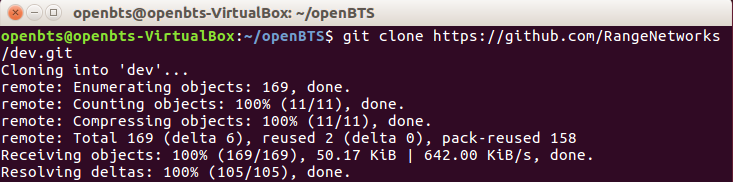

## 6. Baixar os componentes (asterisk, asterisk-config, CommonLibs, NodeManager, SR, subscriberRegistry e system-config). Digite no terminal:

In [ ]:
$ cd dev
$ ./clone.sh

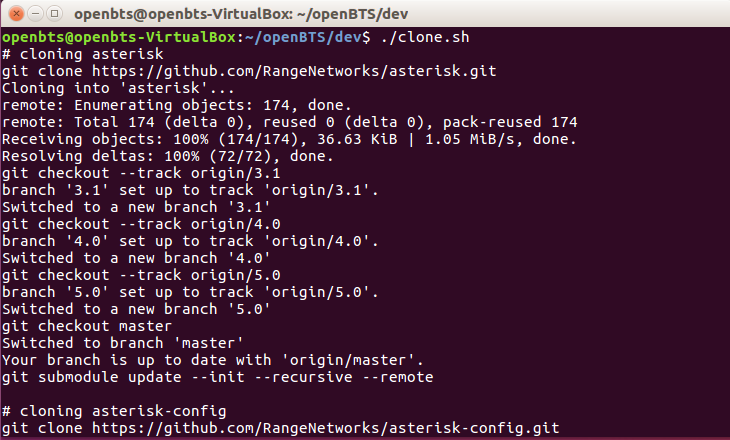

## 7. Antes de compilar você deve escolher um branch usando switchto.sh. Digite no terminal:

In [ ]:
$ ./switchto.sh master
(or)
$ ./switchto.sh 4.0
(or)
$ ./switchto.sh v4.0.0

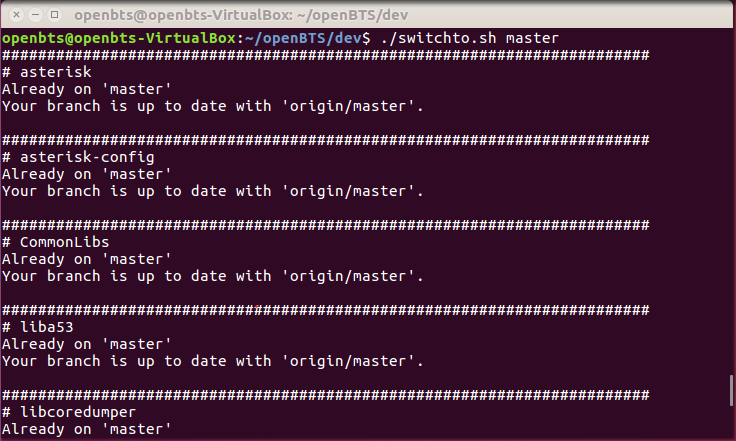

## 8. O script build.sh instalará automaticamente todas as dependências de compilação e construirá um pacote de instalação para cada componente. Digite no terminal:
Depois que as dependências são resolvidas, cada componente é compilado em um pacote instalável.

$ ./build.sh < radio-type >

In [ ]:
O rádio disponível em laboratório é o N210.
Os pacotes compilados estão agora em um novo diretório chamado BUILDS/data-horas.

É possível que você receba uma mensagem indicando dependências, digite a senha de
administrador e pressione ENTER para continuar. Agora pode ir tomar uma água, pois esse
processo vai demorar!

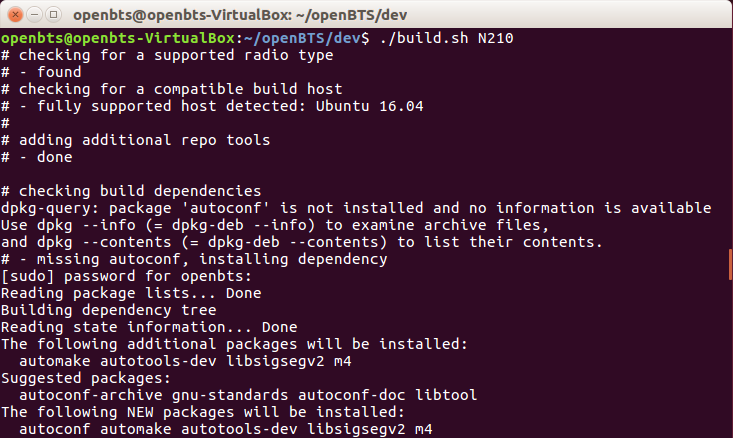

## 9. Use o dpkg para instalar os novos pacotes (isso irá reclamar das dependências). Digite no terminal (por exemplo):

In [ ]:
$ sudo dpkg -i BUILDS/2022-08-29--16-20-43/*.deb

Digite Y se for perguntado se você quer realmente instalar os pacotes.
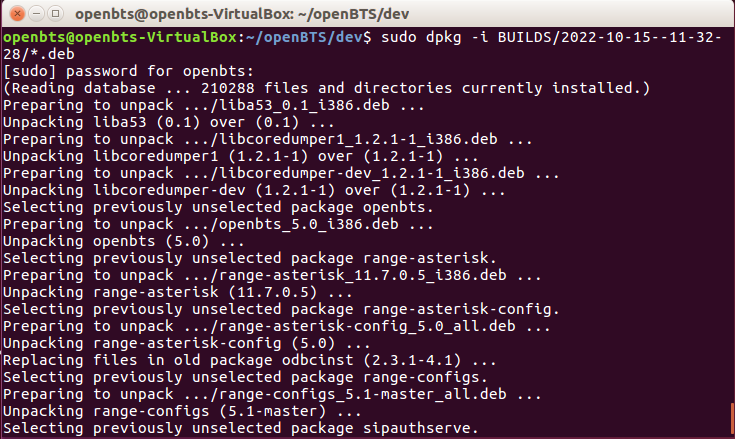

## 10. Para que o Aptitude resolva as dependências, Digite no terminal:

In [ ]:
$ sudo apt-get -f install

Digite Y se for perguntado se você quer realmente instalar os pacotes.
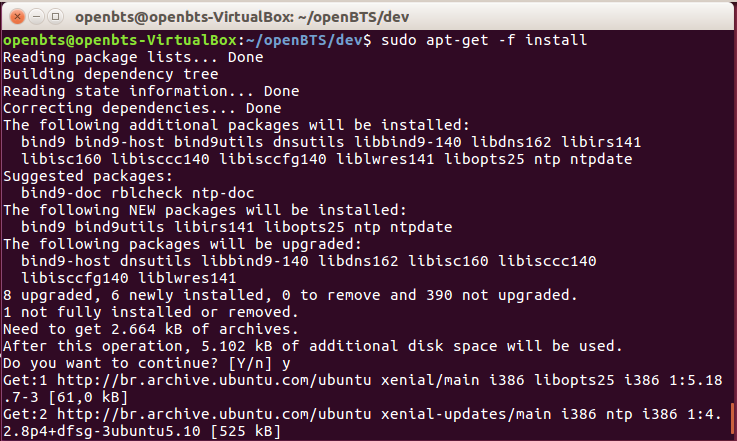

Esses procedimentos seguem os passos de [https://github.com/RangeNetworks/dev/wiki](https://github.com/RangeNetworks/dev/wiki). 

## 11. Inserir mais uma vez o comando do passo 10.

In [ ]:
$ sudo dpkg -i BUILDS/2022-08-29--16-20-43/*.deb

## 12. Você precisa criar um link simbólico para o arquivo executável transceiver52M. Digite no terminal:

In [ ]:
cd openbts/apps/
ln -s ../Transceiver52M/transceiver .

Para testar se o link foi criado, digite:

In [ ]:
ls –lah

Você verá a seguinte tela (o link aparecerá em azul no final):
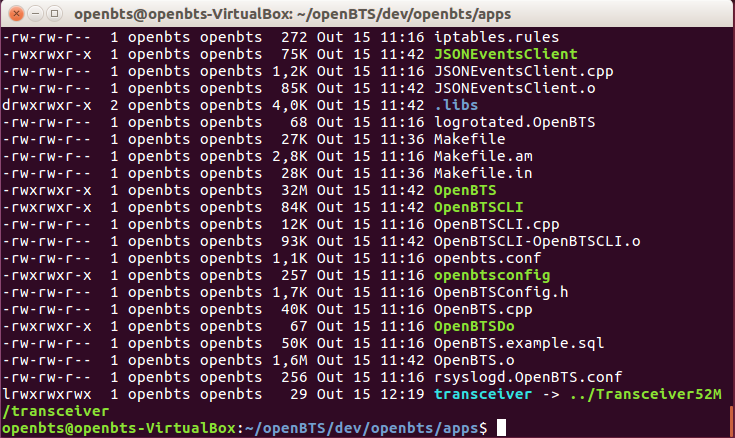

## 13. Verificando a configuração do OpenBTS. Procure se o seguinte arquivo existe: /etc/OpenBTS/OpenBTS.db
Ele é um banco de dados que guarda todas as configurações do OpenBTS. Ele precisa ser criado na pasta “/etc/OpenBTS”. Para verificar se o arquivo existe, digite no terminal:

In [ ]:
ls /etc/OpenBTS/OpenBTS.db
sudo sqlite3 -init ./apps/OpenBTS.example.sql /etc/OpenBTS/OpenBTS.db ".quit"

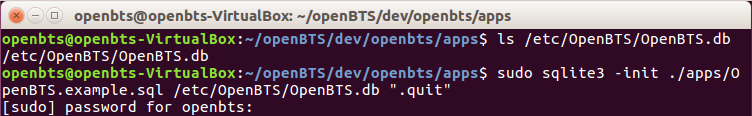

Você ainda pode testar se o arquivo com o seguinte comando:

In [ ]:
sudo sqlite3 /etc/OpenBTS/OpenBTS.db .dump

Se você visualizar uma série de variáveis de configuração, o banco de dados está instalado corretamente.
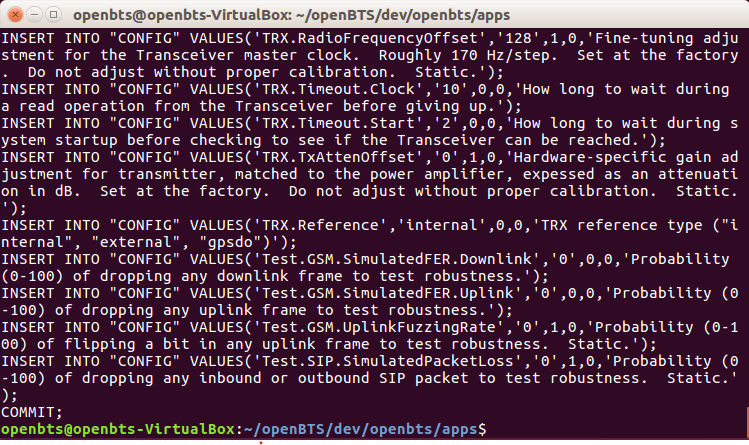

Se o arquivo não existir, digite a sequencia de comandos abaixo para criá-lo:

In [ ]:
sudo mkdir /etc/OpenBTS
sudo sqlite3 -init ./OpenBTS.example.sql /etc/OpenBTS/OpenBTS.db ".quit"

Ao final, você verá a seguinte tela:

## 14. Configurar segundo adaptador na máquina virtual

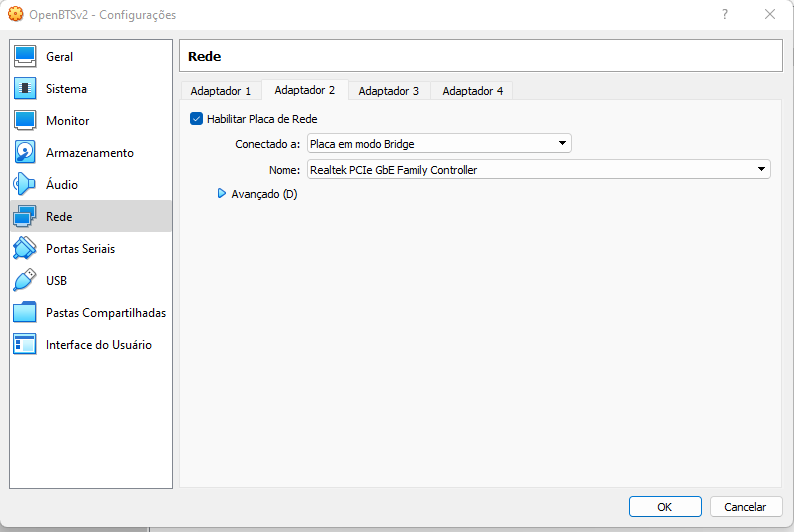

Inserir IP fixo no segundo adaptador, 192.168.10.1/24.

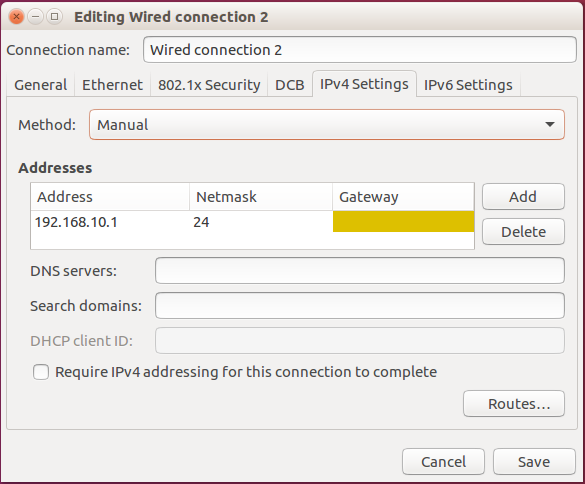

## 15. Rodar openBTS

Plug a USRP no computador, abra outro terminal (crtl+alt+t) e digite:

In [ ]:
uhd_usrp_probe

Antes de abrir o openBTS é importante verificar algumas mensagens de Alerta (warnings).

Se necessario atualização do firmware.

In [ ]:
sudo su
/usr/lib/uhd/utils/uhd_images_downloader.py
/sudo /usr/bin/uhd_image_loader --args="type=usrp2, addr=192.168.1.2"

Se relacionadas com a memória alocada para a USRP. Duas mensagens em especial, sugere para que dois buffers sejam modificados. Digite em um terminal:

In [ ]:
sudo sysctl -w net.core.rmem_max=50000000
sudo sysctl -w net.core.wmem_max=1048576

Se você vir a seguinte mensagem de alerta, tudo deu certo.

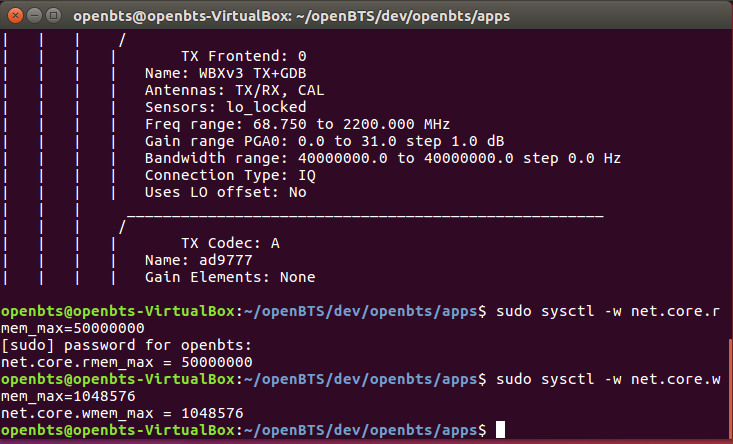

Agora, para iniciar o OpenBTS, digite:

In [ ]:
sudo ./OpenBTS

A seguir, CLI do OpenBTS:

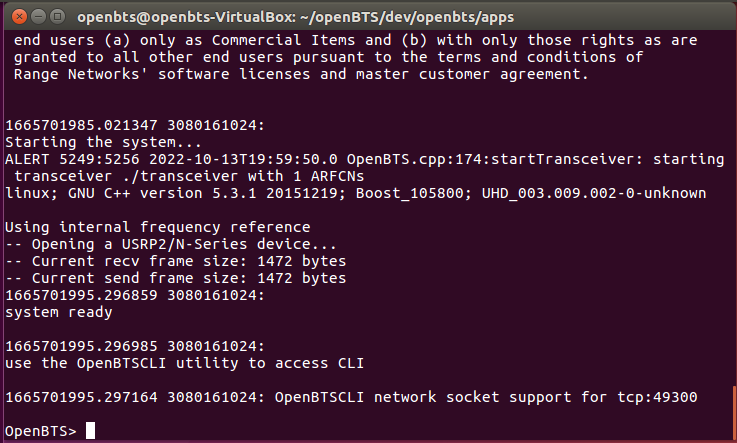